In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

In [2]:
#Importing Data

data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)

In [3]:
#Allocating variables to features & target. 

X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
Y = df['TARGET']

#Transforming categorical features to numerical values

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                         
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])

le.fit(X['FONDKAPREMONT_MODE'].astype(str))
X['FONDKAPREMONT_MODE'] = le.transform(X['FONDKAPREMONT_MODE'].astype(str))

le.fit(X['HOUSETYPE_MODE'].astype(str))
X['HOUSETYPE_MODE'] = le.transform(X['HOUSETYPE_MODE'].astype(str))

le.fit(X['WALLSMATERIAL_MODE'].astype(str))
X['WALLSMATERIAL_MODE'] = le.transform(X['WALLSMATERIAL_MODE'].astype(str))

le.fit(X['EMERGENCYSTATE_MODE'].astype(str))
X['EMERGENCYSTATE_MODE'] = le.transform(X['EMERGENCYSTATE_MODE'].astype(str))



# Replacing any NaNs with the mean of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())
X.shape

(307511, 120)

In [4]:
#Splitting for Random Forest regressor, using all variables 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [5]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=120)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [6]:
rf.feature_importances_

array([1.51397412e-03, 4.81124713e-03, 2.88556305e-03, 3.73223599e-03,
       5.64150276e-03, 3.21570225e-02, 2.86416807e-02, 3.87095942e-02,
       2.15176310e-02, 7.48882423e-03, 5.70286348e-03, 5.44988986e-03,
       9.64044310e-03, 6.82962366e-03, 3.21927523e-02, 4.74059933e-02,
       3.85000773e-02, 4.73690092e-02, 4.76090795e-02, 1.85588039e-02,
       0.00000000e+00, 6.23343212e-04, 4.00712614e-03, 5.22314181e-04,
       3.50547321e-03, 2.43771981e-03, 1.58459524e-02, 8.15002630e-03,
       3.42635429e-03, 3.75197402e-03, 1.51745561e-02, 2.73558542e-02,
       1.45642942e-03, 1.36266484e-03, 1.66746208e-03, 4.19527980e-03,
       3.21451381e-03, 3.32869936e-03, 2.09791016e-02, 3.50123222e-02,
       7.63181852e-02, 6.13195741e-02, 4.38146383e-03, 4.59155340e-03,
       5.59477912e-03, 4.00865018e-03, 3.98255644e-03, 1.74292221e-03,
       4.00357694e-03, 2.58562502e-03, 2.75249014e-03, 5.33815547e-03,
       3.64347495e-03, 5.39961837e-03, 2.13439638e-03, 4.22653745e-03,
      

Text(0.5, 0, 'Random Forest Feature Importance')

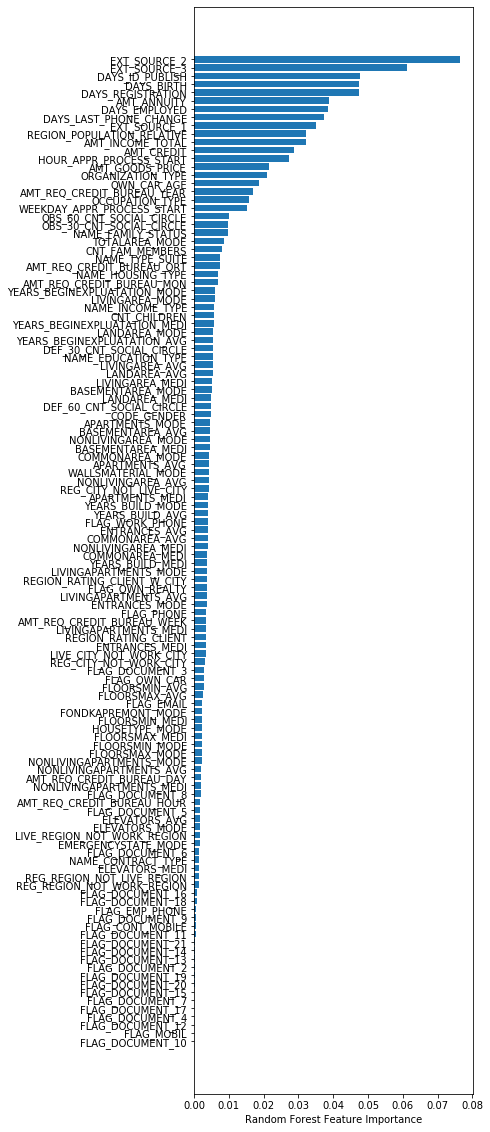

In [7]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [8]:
## I know that there are many variables with many NaNs. Will look at the variables to see if  there is a large imbalance in 
## in variables with NaNs.

In [9]:
#Looking to see which coolumn has most NaNs
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [10]:
# deleting colums with most NaNs. All these colums have more than 10K NaNs. Some have more than 20K.
NaNs = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
X = X.drop(NaNs, axis = 1)
  
Y = df['TARGET']

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                           
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])



#Any NaNs that are left, are less than 1K per feature. Therefore, replacing these NaNs with means of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())

X.shape

(307511, 64)

In [11]:
#Running Randon Forest Regressor again with our newly reduced 64 variables. 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

rf = RandomForestRegressor(n_estimators=64)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=64, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
rf.feature_importances_

array([1.99805070e-03, 5.23092376e-03, 4.10528674e-03, 6.63661955e-03,
       8.57455188e-03, 5.12101835e-02, 4.94244302e-02, 6.64338738e-02,
       3.62448147e-02, 1.14354263e-02, 8.54512766e-03, 1.05870263e-02,
       1.63753758e-02, 1.06339017e-02, 4.97905152e-02, 8.09896856e-02,
       6.93659494e-02, 8.08963827e-02, 7.81044111e-02, 2.67580960e-02,
       0.00000000e+00, 6.77339491e-04, 6.60325218e-03, 6.82652003e-04,
       6.42681061e-03, 4.65099061e-03, 2.58151090e-02, 1.28299365e-02,
       5.21673927e-03, 6.02580995e-03, 2.66859011e-02, 4.29221463e-02,
       1.88435631e-03, 2.18215182e-03, 2.40906955e-03, 5.51698648e-03,
       5.04941404e-03, 5.08089819e-03, 3.47243226e-02, 1.58818115e-02,
       7.92329788e-03, 1.61024193e-02, 7.10658882e-03, 6.76105987e-02,
       1.53498239e-04, 4.34826955e-03, 9.08269196e-07, 2.24922197e-03,
       2.30337028e-03, 8.76152615e-05, 2.42144003e-03, 6.90370753e-04,
       0.00000000e+00, 5.09917387e-04, 0.00000000e+00, 2.08983946e-04,
      

Text(0.5, 0, 'Random Forest Feature Importance')

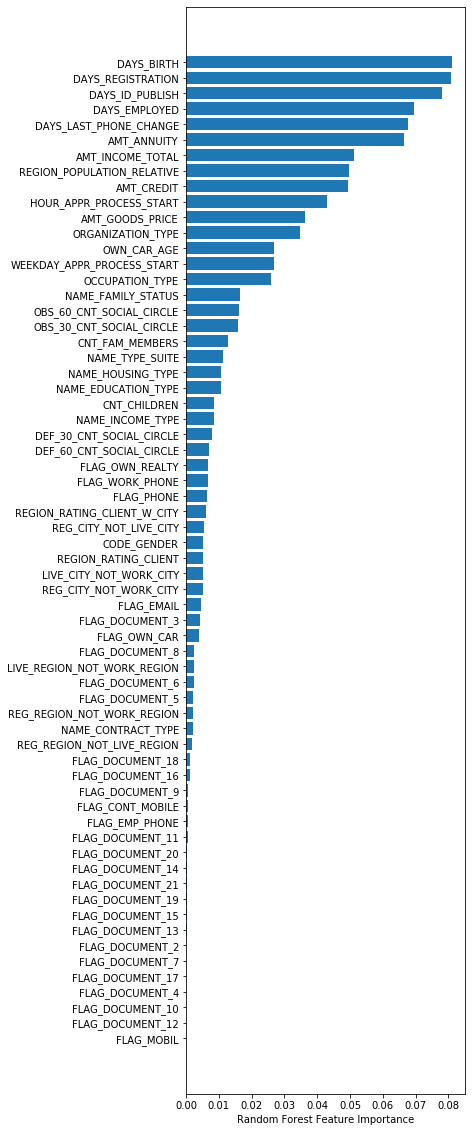

In [13]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [14]:
## The variabels of importance will be the variables that are mostly visible. So it will stop at Flag_Document_16